# Xây dựng mô hình học máy trên dữ liệu ung thư vú

Ung thư vú là một trong những bệnh ung thư phổ biến nhất ở phụ nữ trên toàn thế giới, đại diện cho phần lớn các trường hợp ung thư mới và tử vong do ung thư theo thống kê toàn cầu, khiến nó trở thành một vấn đề sức khỏe cộng đồng quan trọng trong xã hội ngày nay.

Việc chẩn đoán sớm có thể cải thiện đáng kể cơ hội sống sót, vì nó có thể thúc đẩy điều trị lâm sàng kịp thời cho bệnh nhân. Việc phân loại chính xác các khối u lành tính có thể giúp bệnh nhân không phải trải qua các phương pháp điều trị không cần thiết. Vì vậy, chẩn đoán chính xác ung thư  và phân loại bệnh nhân vào nhóm ác tính hoặc lành tính là chủ đề của nhiều nghiên cứu. Do những ưu điểm độc đáo của nó trong việc phát hiện các tính năng quan trọng từ các bộ dữ liệu ung thư phức tạp, học máy (ML) là phương pháp được lựa chọn trong phân loại mẫu và mô hình dự đoán.

Phương pháp phân loại và khai thác dữ liệu là một cách hiệu quả để phân loại dữ liệu. Đặc biệt là trong lĩnh vực y tế, nơi những phương pháp đó được sử dụng rộng rãi trong chẩn đoán và phân tích để đưa ra quyết định.

### Bước 1: Chuẩn bị data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("dataset.csv")
df = df.drop(columns="Unnamed: 32",axis=1)

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- column 2: diagnosis (M = ác tính, B = lành tính) - biến target

Mười features có giá trị thực được tính cho mỗi bệnh nhân:

- radius (trung bình của khoảng cách từ tâm đến các điểm trên chu vi)
- texture (độ lệch chuẩn của các giá trị thang xám)
- perimeter
- area
- smoothness (sự thay đổi cục bộ trong độ dài bán kính)
- compactness (perimeter² / area — 1.0)
- concavity (mức độ nghiêm trọng của các phần lõm của đường viền)
- concave points (số phần lõm của đường viền)
- symmetry
- fractal dimension (“ước lượng coastline ” - 1)

Có thể thấy các features trên là hữu ích nhất trong việc dự đoán ung thư ác tính hoặc lành tính. Mục đích là để phân loại ung thư vú là lành tính hay ác tính. Để đạt được điều này, ta sử dụng các phương pháp phân loại học máy để phù hợp với một hàm có thể dự đoán lớp rời rạc của đầu vào mới.

### Bước 2: Khám phá dữ liệu

In [4]:
print("Kích thước tập dữ liệu ung thư : {}".format(df.shape))

Kích thước tập dữ liệu ung thư : (569, 32)


In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


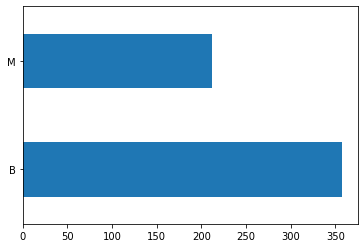

In [6]:
df.diagnosis.value_counts().plot(kind='barh')

Chúng ta có thể thấy rằng tập dữ liệu chứa 569 hàng và 32 cột. 'diagnosis' là cột mà chúng ta sẽ dự đoán, cho biết ung thư là M = ác tính hay B = lành tính. 1 có nghĩa là ung thư ác tính và 0 có nghĩa là lành tính. Chúng ta có thể xác định rằng trong số 569 người, 357 người được dán nhãn là B (lành tính) và 212 người là M (ác tính).

Trực quan hóa dữ liệu giúp ta hiểu dữ liệu và cũng để giải thích dữ liệu cho người khác. Python có một số thư viện để trực quan hóa như Matplotlib, Seaborn, v.v.

In [7]:
a = df.columns
a = a.drop("id")
a = a.drop("diagnosis")

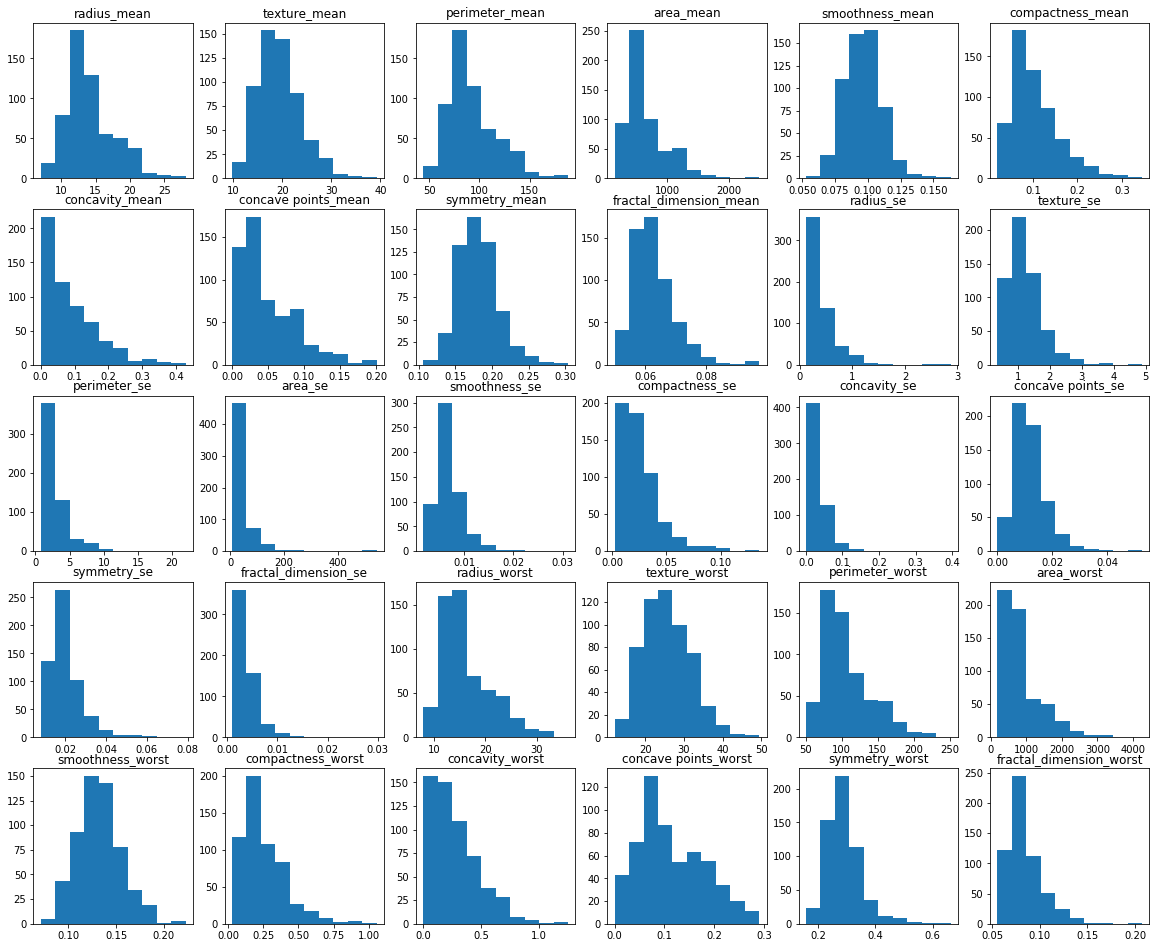

In [8]:
plt.figure(figsize=(20,20))
for i in range(len(a)):
    plt.subplot(6,6,i+1)
    plt.hist(df[a[i]])
    plt.title(a[i])
plt.show()

Chúng ta có thể tìm thấy bất kỳ điểm dữ liệu nào bị thiếu hoặc null của tập dữ liệu (nếu có) bằng cách sử dụng hàm pandas sau.

In [9]:
df.isnull().sum()
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Dữ liệu phân loại là các biến chứa giá trị label chứ không phải giá trị số. Số lượng giá trị có thể có thường bị giới hạn trong một tập hợp cố định. Ví dụ: người dùng thường được mô tả theo quốc gia, giới tính, nhóm tuổi, v.v.

Chuyển đổi cột diagnosis là một đối tượng trong khung dữ liệu thành một giá trị số rời rạc.

In [11]:
df['diagnosis'] = pd.Categorical(df['diagnosis'])
df['diagnosis'] = df.diagnosis.cat.codes

In [12]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int8

Dữ liệu sử dụng thường được chia thành dữ liệu đào tạo và dữ liệu kiểm tra. Tập huấn luyện chứa một đầu ra đã biết và mô hình học trên dữ liệu này để tổng quát hóa cho dữ liệu khác sau này.Ta có tập dữ liệu thử nghiệm (test) để kiểm tra dự đoán của mô hình. Thực hiện việc này bằng cách sử dụng thư viện SciKit-Learn trong Python bằng phương thức train_test_split.

In [13]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Bước 3: Chuẩn hóa data

Hầu hết các trường hợp, tập dữ liệu sẽ chứa các đặc trưng rất khác nhau về độ lớn, đơn vị và phạm vi. Chúng ta cần đưa tất cả các đặc trưng về cùng một mức độ lớn. Điều này có nghĩa là ta chuyển đổi dữ liệu của mình sao cho phù hợp với một tỷ lệ cụ thể, như 0–100 hoặc 0–1.

Sử dụng phương pháp StandardScaler từ thư viện SciKit-Learn.

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Bước 4: Lựa chon model

Đây còn được gọi là lựa chọn thuật toán để Dự đoán kết quả tốt nhất.

Các thuật toán khác nhau đó có thể được phân loại thành hai nhóm: học có giám sát và học không giám sát.

- Học có giám sát: là một loại hệ thống trong đó cả dữ liệu đầu vào và đầu ra mong muốn đều được cung cấp. Dữ liệu đầu vào và đầu ra được gắn nhãn để phân loại nhằm cung cấp cơ sở học tập cho việc xử lý dữ liệu trong tương lai. Các vấn đề học tập có giám sát có thể được nhóm lại thành các vấn đề Hồi quy và Phân loại.

- Học không giám sát: là thuật toán sử dụng thông tin không được phân loại cũng như không được gắn nhãn và cho phép thuật toán khám phá, tìm hiểu trên thông tin đó mà không cần target.

Trong tập dữ liệu ung thư vú, ta có biến kết quả hoặc biến phụ thuộc, tức là Y chỉ có hai bộ giá trị, M hoặc B . Vì vậy,sẽ sử dụng thuật toán phân loại của học có giám sát.

Có các loại thuật toán phân loại khác nhau trong Học máy mà tôi đã biết:

1. Logistic Regression
2. Support Vector Machines
3. Decision Tree Algorithm

Ta sử dụng thư viện sklearn để nhập phương pháp của thuật toán phân loại.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [17]:
def train_model(X_train, Y_train, mode):
    
    if mode == "logistic":
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, Y_train)
    
    elif mode == "SVM_no":
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, Y_train)
    
    elif mode == "SVM_kernel":
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, Y_train)
    
    elif mode == "tree":
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, Y_train)
    
    return classifier

### Bước 5: Training và evaluate

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**LogisticRegression**

In [19]:
model_logistic = train_model(X_train, Y_train,"logistic")
Y_pred = model_logistic.predict(X_test)

[[87  3]
 [ 3 50]]


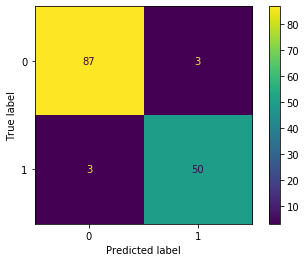

In [20]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plot_confusion_matrix(model_logistic, X_test, Y_test)
plt.show()

In [21]:
print("Accuracy of LogisticRegression: {0:.1f} %".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of LogisticRegression: 95.8 %


**Support Vector Machines**

In [22]:
model_svm = train_model(X_train, Y_train, "SVM_no")
Y_pred = model_svm.predict(X_test)

[[88  2]
 [ 2 51]]


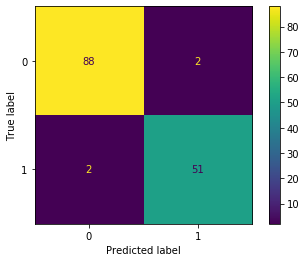

In [23]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plot_confusion_matrix(model_svm, X_test, Y_test)
plt.show()

In [24]:
print("Accuracy of SVM linear: {0:.1f} %".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of SVM linear: 97.2 %


**Support Vector Machine with kernel**

In [25]:
model_svmker = train_model(X_train, Y_train, "SVM_kernel")
Y_pred = model_svmker.predict(X_test)

[[88  2]
 [ 3 50]]


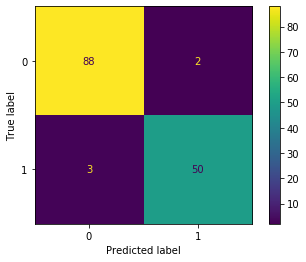

In [26]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plot_confusion_matrix(model_svmker, X_test, Y_test)
plt.show()

In [27]:
print("Accuracy of SVM kernel: {0:.1f} %".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of SVM kernel: 96.5 %


**DecisionTreeClassifier**

In [28]:
model_tree = train_model(X_train, Y_train, "tree")
Y_pred = model_tree.predict(X_test)

[[86  4]
 [ 2 51]]


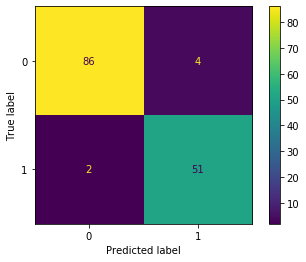

In [29]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
plot_confusion_matrix(model_tree, X_test, Y_test)
plt.show()

In [30]:
print("Accuracy of DecisionTreeClassifier: {0:.1f} %".format(accuracy_score(Y_test,Y_pred)*100))

Accuracy of DecisionTreeClassifier: 95.8 %


Cuối cùng ta đã xây dựng mô hình phân loại của mình và có thể thấy rằng thuật toán Phân loại Support Vector Machines mang lại kết quả tốt nhất cho tập dữ liệu. Nó không phải lúc nào cũng áp dụng cho mọi tập dữ liệu. Để chọn mô hình mang lại kết quả tốt,  ta luôn cần phân tích tập dữ liệu và sau đó áp dụng mô hình học máy phù hợp.